In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import sampler

import help_func
import new_ALL_Conv

right


In [2]:
train_batch_size = 4
test_batch_size = 4

NUM_TRAIN = 49000

transform = transforms.Compose(
          [transforms.ToTensor(),
           transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

cifar10_train = torchvision.datasets.CIFAR10('./cs231n/datasets', train=True, download=True,
                             transform=transform)
loader_train = torch.utils.data.DataLoader(cifar10_train, batch_size=train_batch_size, 
                          sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN)))

cifar10_val = torchvision.datasets.CIFAR10('./cs231n/datasets', train=True, download=True,
                           transform=transform)
loader_val = torch.utils.data.DataLoader(cifar10_val, batch_size=train_batch_size, 
                        sampler=sampler.SubsetRandomSampler(range(NUM_TRAIN, 50000)))

cifar10_test = torchvision.datasets.CIFAR10('./cs231n/datasets', train=False, download=True, 
                            transform=transform)
loader_test = torch.utils.data.DataLoader(cifar10_test, batch_size=test_batch_size)

Files already downloaded and verified
Files already downloaded and verified
Files already downloaded and verified


In [3]:
class ALL_CNN_C(nn.Module):
    def __init__(self, num_classes=10):
        super (ALL_CNN_C, self).__init__()
        self.num_classes = num_classes
        
        self.conv1 = nn.Conv2d(3, 96, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv1.weight)
        nn.init.constant_(self.conv1.bias, 0)
        
        self.dropout1 = nn.Dropout2d(0.2)
        
        self.conv2 = nn.Conv2d(96, 96, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv2.weight)
        nn.init.constant_(self.conv2.bias, 0)
        
        self.conv3 = nn.Conv2d(96, 96, kernel_size=3, stride=2, padding=0)
        nn.init.kaiming_normal_(self.conv3.weight)
        nn.init.constant_(self.conv3.bias, 0)
        
        self.dropout2 = nn.Dropout(0.5)
        
        self.conv4 = nn.Conv2d(96, 192, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv3.weight)
        nn.init.constant_(self.conv3.bias, 0)
        
        self.conv5 = nn.Conv2d(192, 192, kernel_size=3, stride=1, padding=1)
        nn.init.kaiming_normal_(self.conv5.weight)
        nn.init.constant_(self.conv5.bias, 0)
        
        self.conv6 = nn.Conv2d(192, 192, kernel_size=3, stride=2, padding=0)
        nn.init.kaiming_normal_(self.conv6.weight)
        nn.init.constant_(self.conv6.bias, 0)
        
        self.dropout3 = nn.Dropout(0.5)
        
        self.conv7 = nn.Conv2d(192, 192, kernel_size=3, padding=3)
        nn.init.kaiming_normal_(self.conv7.weight)
        nn.init.constant_(self.conv7.bias, 0)
        
        self.conv8 = nn.Conv2d(192, 192, kernel_size=1)
        nn.init.kaiming_normal_(self.conv8.weight)
        nn.init.constant_(self.conv8.bias, 0)
        
        self.conv9 = nn.Conv2d(192, self.num_classes, kernel_size=1)
        nn.init.kaiming_normal_(self.conv9.weight)
        nn.init.constant_(self.conv9.bias, 0)
        
        self.glb_avg = nn.AvgPool2d(6)
        
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = self.dropout1(out)
        
        out = self.conv2(out)
        out = F.relu(out)
        
        out = self.conv3(out)
        out = F.relu(out)
        
        out = self.dropout2(out)
        
        out = self.conv4(out)
        out = F.relu(out)
        
        out = self.conv5(out)
        out = F.relu(out)
        
        out = self.conv6(out)
        out = F.relu(out)
        
        out = self.dropout3(out)
        
        out = self.conv7(out)
        out = F.relu(out)
        
        out = self.conv8(out)
        out = F.relu(out)
        
        out = self.conv9(out)
        out = F.relu(out)
        
        out = self.glb_avg(out)
        out = out.view(-1, self.num_classes)
        return out
orig_all_cnn_c = ALL_CNN_C(num_classes=10)


using device: cuda
begin training
Checking accuracy on validation set
Got 220 / 1000 correct (22.00)
1 epoch,  1000 iteration, loss:2.222
Checking accuracy on validation set
Got 241 / 1000 correct (24.10)
1 epoch,  2000 iteration, loss:2.159
Checking accuracy on validation set
Got 258 / 1000 correct (25.80)
1 epoch,  3000 iteration, loss:2.078
Checking accuracy on validation set
Got 262 / 1000 correct (26.20)
1 epoch,  4000 iteration, loss:2.004
Checking accuracy on validation set
Got 322 / 1000 correct (32.20)
1 epoch,  5000 iteration, loss:1.937
Checking accuracy on validation set
Got 325 / 1000 correct (32.50)
1 epoch,  6000 iteration, loss:1.918
Checking accuracy on validation set
Got 372 / 1000 correct (37.20)
1 epoch,  7000 iteration, loss:1.838
Checking accuracy on validation set
Got 397 / 1000 correct (39.70)
1 epoch,  8000 iteration, loss:1.764
Checking accuracy on validation set
Got 393 / 1000 correct (39.30)
1 epoch,  9000 iteration, loss:1.718
Checking accuracy on validatio

Got 699 / 1000 correct (69.90)
7 epoch,  4000 iteration, loss:0.898
Checking accuracy on validation set
Got 714 / 1000 correct (71.40)
7 epoch,  5000 iteration, loss:0.875
Checking accuracy on validation set
Got 678 / 1000 correct (67.80)
7 epoch,  6000 iteration, loss:0.896
Checking accuracy on validation set
Got 717 / 1000 correct (71.70)
7 epoch,  7000 iteration, loss:0.883
Checking accuracy on validation set
Got 701 / 1000 correct (70.10)
7 epoch,  8000 iteration, loss:0.880
Checking accuracy on validation set
Got 686 / 1000 correct (68.60)
7 epoch,  9000 iteration, loss:0.873
Checking accuracy on validation set
Got 736 / 1000 correct (73.60)
7 epoch, 10000 iteration, loss:0.873
Checking accuracy on validation set
Got 694 / 1000 correct (69.40)
7 epoch, 11000 iteration, loss:0.874
Checking accuracy on validation set
Got 732 / 1000 correct (73.20)
7 epoch, 12000 iteration, loss:0.880
 num 6 epoch 
####### Training Loss #######
[0.86412588]
Checking accuracy on validation set
Got 726

Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
13 epoch,  8000 iteration, loss:0.647
Checking accuracy on validation set
Got 788 / 1000 correct (78.80)
13 epoch,  9000 iteration, loss:0.686
Checking accuracy on validation set
Got 775 / 1000 correct (77.50)
13 epoch, 10000 iteration, loss:0.680
Checking accuracy on validation set
Got 769 / 1000 correct (76.90)
13 epoch, 11000 iteration, loss:0.678
Checking accuracy on validation set
Got 782 / 1000 correct (78.20)
13 epoch, 12000 iteration, loss:0.678
 num 12 epoch 
####### Training Loss #######
[0.65513467]
Checking accuracy on validation set
Got 789 / 1000 correct (78.90)
14 epoch,  1000 iteration, loss:0.641
Checking accuracy on validation set
Got 777 / 1000 correct (77.70)
14 epoch,  2000 iteration, loss:0.611
Checking accuracy on validation set
Got 797 / 1000 correct (79.70)
14 epoch,  3000 iteration, loss:0.661
Checking accuracy on validation set
Got 789 / 1000 correct (78.90)
14 epoch,  4000 iteration, loss:0.6

Checking accuracy on validation set
Got 770 / 1000 correct (77.00)
19 epoch, 11000 iteration, loss:0.566
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
19 epoch, 12000 iteration, loss:0.559
 num 18 epoch 
####### Training Loss #######
[0.55773828]
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
20 epoch,  1000 iteration, loss:0.535
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
20 epoch,  2000 iteration, loss:0.539
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
20 epoch,  3000 iteration, loss:0.558
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
20 epoch,  4000 iteration, loss:0.562
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
20 epoch,  5000 iteration, loss:0.552
Checking accuracy on validation set
Got 790 / 1000 correct (79.00)
20 epoch,  6000 iteration, loss:0.570
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
20 epoch,  7000 iteration, loss:0.5

Got 844 / 1000 correct (84.40)
26 epoch,  1000 iteration, loss:0.497
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
26 epoch,  2000 iteration, loss:0.500
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
26 epoch,  3000 iteration, loss:0.487
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
26 epoch,  4000 iteration, loss:0.492
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
26 epoch,  5000 iteration, loss:0.497
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
26 epoch,  6000 iteration, loss:0.527
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
26 epoch,  7000 iteration, loss:0.516
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
26 epoch,  8000 iteration, loss:0.485
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
26 epoch,  9000 iteration, loss:0.507
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
26 epoch, 10000 iteratio

Got 796 / 1000 correct (79.60)
32 epoch,  4000 iteration, loss:0.465
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
32 epoch,  5000 iteration, loss:0.467
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
32 epoch,  6000 iteration, loss:0.460
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
32 epoch,  7000 iteration, loss:0.478
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
32 epoch,  8000 iteration, loss:0.465
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
32 epoch,  9000 iteration, loss:0.450
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
32 epoch, 10000 iteration, loss:0.483
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
32 epoch, 11000 iteration, loss:0.487
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
32 epoch, 12000 iteration, loss:0.475
 num 31 epoch 
####### Training Loss #######
[0.45607103]
Checking accuracy on validation s

Got 836 / 1000 correct (83.60)
38 epoch,  7000 iteration, loss:0.443
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
38 epoch,  8000 iteration, loss:0.445
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
38 epoch,  9000 iteration, loss:0.449
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
38 epoch, 10000 iteration, loss:0.461
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
38 epoch, 11000 iteration, loss:0.449
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
38 epoch, 12000 iteration, loss:0.482
 num 37 epoch 
####### Training Loss #######
[0.4320715]
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
39 epoch,  1000 iteration, loss:0.414
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
39 epoch,  2000 iteration, loss:0.426
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
39 epoch,  3000 iteration, loss:0.425
Checking accuracy on validation se

Got 823 / 1000 correct (82.30)
44 epoch, 10000 iteration, loss:0.426
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
44 epoch, 11000 iteration, loss:0.418
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
44 epoch, 12000 iteration, loss:0.445
 num 43 epoch 
####### Training Loss #######
[0.40606007]
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
45 epoch,  1000 iteration, loss:0.387
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
45 epoch,  2000 iteration, loss:0.393
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
45 epoch,  3000 iteration, loss:0.378
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
45 epoch,  4000 iteration, loss:0.396
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
45 epoch,  5000 iteration, loss:0.399
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
45 epoch,  6000 iteration, loss:0.405
Checking accuracy on validation s

Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
51 epoch,  1000 iteration, loss:0.373
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
51 epoch,  2000 iteration, loss:0.380
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
51 epoch,  3000 iteration, loss:0.401
Checking accuracy on validation set
Got 855 / 1000 correct (85.50)
51 epoch,  4000 iteration, loss:0.384
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
51 epoch,  5000 iteration, loss:0.387
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
51 epoch,  6000 iteration, loss:0.403
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
51 epoch,  7000 iteration, loss:0.395
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
51 epoch,  8000 iteration, loss:0.415
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
51 epoch,  9000 iteration, loss:0.425
Checking accuracy on validation set
Got 836 / 1000 corr

Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
57 epoch,  4000 iteration, loss:0.394
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
57 epoch,  5000 iteration, loss:0.394
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
57 epoch,  6000 iteration, loss:0.418
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
57 epoch,  7000 iteration, loss:0.418
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
57 epoch,  8000 iteration, loss:0.391
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
57 epoch,  9000 iteration, loss:0.407
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
57 epoch, 10000 iteration, loss:0.404
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
57 epoch, 11000 iteration, loss:0.414
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
57 epoch, 12000 iteration, loss:0.414
 num 56 epoch 
####### Training Loss #######
[0.3882928

Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
63 epoch,  7000 iteration, loss:0.382
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
63 epoch,  8000 iteration, loss:0.390
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
63 epoch,  9000 iteration, loss:0.385
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
63 epoch, 10000 iteration, loss:0.400
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
63 epoch, 11000 iteration, loss:0.417
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
63 epoch, 12000 iteration, loss:0.420
 num 62 epoch 
####### Training Loss #######
[0.37515081]
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
64 epoch,  1000 iteration, loss:0.345
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
64 epoch,  2000 iteration, loss:0.362
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
64 epoch,  3000 iteration, loss:0.3

Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
69 epoch, 10000 iteration, loss:0.400
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
69 epoch, 11000 iteration, loss:0.390
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
69 epoch, 12000 iteration, loss:0.382
 num 68 epoch 
####### Training Loss #######
[0.36741895]
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
70 epoch,  1000 iteration, loss:0.337
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
70 epoch,  2000 iteration, loss:0.361
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
70 epoch,  3000 iteration, loss:0.348
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
70 epoch,  4000 iteration, loss:0.360
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
70 epoch,  5000 iteration, loss:0.369
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
70 epoch,  6000 iteration, loss:0.4

 num 74 epoch 
####### Training Loss #######
[0.3632993]
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
76 epoch,  1000 iteration, loss:0.305
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
76 epoch,  2000 iteration, loss:0.350
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
76 epoch,  3000 iteration, loss:0.355
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
76 epoch,  4000 iteration, loss:0.354
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
76 epoch,  5000 iteration, loss:0.374
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
76 epoch,  6000 iteration, loss:0.361
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
76 epoch,  7000 iteration, loss:0.382
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
76 epoch,  8000 iteration, loss:0.378
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
76 epoch,  9000 iteration, loss:0.38

Got 832 / 1000 correct (83.20)
82 epoch,  3000 iteration, loss:0.346
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
82 epoch,  4000 iteration, loss:0.324
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
82 epoch,  5000 iteration, loss:0.365
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
82 epoch,  6000 iteration, loss:0.363
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
82 epoch,  7000 iteration, loss:0.359
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
82 epoch,  8000 iteration, loss:0.372
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
82 epoch,  9000 iteration, loss:0.409
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
82 epoch, 10000 iteration, loss:0.367
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
82 epoch, 11000 iteration, loss:0.381
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
82 epoch, 12000 iteratio

Got 838 / 1000 correct (83.80)
88 epoch,  6000 iteration, loss:0.372
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
88 epoch,  7000 iteration, loss:0.369
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
88 epoch,  8000 iteration, loss:0.373
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
88 epoch,  9000 iteration, loss:0.380
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
88 epoch, 10000 iteration, loss:0.373
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
88 epoch, 11000 iteration, loss:0.371
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
88 epoch, 12000 iteration, loss:0.393
 num 87 epoch 
####### Training Loss #######
[0.35528131]
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
89 epoch,  1000 iteration, loss:0.318
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
89 epoch,  2000 iteration, loss:0.331
Checking accuracy on validation s

Got 829 / 1000 correct (82.90)
94 epoch,  9000 iteration, loss:0.375
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
94 epoch, 10000 iteration, loss:0.395
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
94 epoch, 11000 iteration, loss:0.385
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
94 epoch, 12000 iteration, loss:0.377
 num 93 epoch 
####### Training Loss #######
[0.35315682]
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
95 epoch,  1000 iteration, loss:0.346
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
95 epoch,  2000 iteration, loss:0.336
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
95 epoch,  3000 iteration, loss:0.357
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
95 epoch,  4000 iteration, loss:0.354
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
95 epoch,  5000 iteration, loss:0.339
Checking accuracy on validation s

Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
100 epoch, 12000 iteration, loss:0.390
 num 99 epoch 
####### Training Loss #######
[0.35155264]
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
101 epoch,  1000 iteration, loss:0.332
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
101 epoch,  2000 iteration, loss:0.339
Checking accuracy on validation set
Got 804 / 1000 correct (80.40)
101 epoch,  3000 iteration, loss:0.339
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
101 epoch,  4000 iteration, loss:0.357
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
101 epoch,  5000 iteration, loss:0.360
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
101 epoch,  6000 iteration, loss:0.351
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
101 epoch,  7000 iteration, loss:0.342
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
101 epoch,  8000 iteration,

Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
107 epoch,  2000 iteration, loss:0.318
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
107 epoch,  3000 iteration, loss:0.331
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
107 epoch,  4000 iteration, loss:0.340
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
107 epoch,  5000 iteration, loss:0.368
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
107 epoch,  6000 iteration, loss:0.377
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
107 epoch,  7000 iteration, loss:0.343
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
107 epoch,  8000 iteration, loss:0.362
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
107 epoch,  9000 iteration, loss:0.370
Checking accuracy on validation set
Got 798 / 1000 correct (79.80)
107 epoch, 10000 iteration, loss:0.398
Checking accuracy on validation set
Got 804 / 

Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
113 epoch,  4000 iteration, loss:0.348
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
113 epoch,  5000 iteration, loss:0.350
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
113 epoch,  6000 iteration, loss:0.345
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
113 epoch,  7000 iteration, loss:0.363
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
113 epoch,  8000 iteration, loss:0.367
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
113 epoch,  9000 iteration, loss:0.376
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
113 epoch, 10000 iteration, loss:0.370
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
113 epoch, 11000 iteration, loss:0.352
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
113 epoch, 12000 iteration, loss:0.393
 num 112 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
119 epoch,  6000 iteration, loss:0.366
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
119 epoch,  7000 iteration, loss:0.328
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
119 epoch,  8000 iteration, loss:0.365
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
119 epoch,  9000 iteration, loss:0.366
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
119 epoch, 10000 iteration, loss:0.372
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
119 epoch, 11000 iteration, loss:0.374
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
119 epoch, 12000 iteration, loss:0.360
 num 118 epoch 
####### Training Loss #######
[0.34227466]
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
120 epoch,  1000 iteration, loss:0.336
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
120 epoch,  2000 iteration

Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
125 epoch,  8000 iteration, loss:0.368
Checking accuracy on validation set
Got 853 / 1000 correct (85.30)
125 epoch,  9000 iteration, loss:0.374
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
125 epoch, 10000 iteration, loss:0.370
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
125 epoch, 11000 iteration, loss:0.380
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
125 epoch, 12000 iteration, loss:0.378
 num 124 epoch 
####### Training Loss #######
[0.34747004]
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
126 epoch,  1000 iteration, loss:0.315
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
126 epoch,  2000 iteration, loss:0.326
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
126 epoch,  3000 iteration, loss:0.330
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
126 epoch,  4000 iteration

Checking accuracy on validation set
Got 790 / 1000 correct (79.00)
131 epoch, 10000 iteration, loss:0.343
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
131 epoch, 11000 iteration, loss:0.374
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
131 epoch, 12000 iteration, loss:0.366
 num 130 epoch 
####### Training Loss #######
[0.33803976]
Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
132 epoch,  1000 iteration, loss:0.300
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
132 epoch,  2000 iteration, loss:0.323
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
132 epoch,  3000 iteration, loss:0.337
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
132 epoch,  4000 iteration, loss:0.346
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
132 epoch,  5000 iteration, loss:0.349
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
132 epoch,  6000 iteration

Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
137 epoch, 12000 iteration, loss:0.371
 num 136 epoch 
####### Training Loss #######
[0.33999656]
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
138 epoch,  1000 iteration, loss:0.301
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
138 epoch,  2000 iteration, loss:0.303
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
138 epoch,  3000 iteration, loss:0.336
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
138 epoch,  4000 iteration, loss:0.324
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
138 epoch,  5000 iteration, loss:0.331
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
138 epoch,  6000 iteration, loss:0.344
Checking accuracy on validation set
Got 847 / 1000 correct (84.70)
138 epoch,  7000 iteration, loss:0.361
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
138 epoch,  8000 iteration

Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
144 epoch,  2000 iteration, loss:0.327
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
144 epoch,  3000 iteration, loss:0.329
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
144 epoch,  4000 iteration, loss:0.342
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
144 epoch,  5000 iteration, loss:0.341
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
144 epoch,  6000 iteration, loss:0.331
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
144 epoch,  7000 iteration, loss:0.353
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
144 epoch,  8000 iteration, loss:0.374
Checking accuracy on validation set
Got 795 / 1000 correct (79.50)
144 epoch,  9000 iteration, loss:0.351
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
144 epoch, 10000 iteration, loss:0.359
Checking accuracy on validation set
Got 832 / 

Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
150 epoch,  4000 iteration, loss:0.306
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
150 epoch,  5000 iteration, loss:0.345
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
150 epoch,  6000 iteration, loss:0.343
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
150 epoch,  7000 iteration, loss:0.317
Checking accuracy on validation set
Got 818 / 1000 correct (81.80)
150 epoch,  8000 iteration, loss:0.351
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
150 epoch,  9000 iteration, loss:0.369
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
150 epoch, 10000 iteration, loss:0.389
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
150 epoch, 11000 iteration, loss:0.375
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
150 epoch, 12000 iteration, loss:0.367
 num 149 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
156 epoch,  6000 iteration, loss:0.354
Checking accuracy on validation set
Got 816 / 1000 correct (81.60)
156 epoch,  7000 iteration, loss:0.324
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
156 epoch,  8000 iteration, loss:0.346
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
156 epoch,  9000 iteration, loss:0.374
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
156 epoch, 10000 iteration, loss:0.358
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
156 epoch, 11000 iteration, loss:0.352
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
156 epoch, 12000 iteration, loss:0.370
 num 155 epoch 
####### Training Loss #######
[0.33649689]
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
157 epoch,  1000 iteration, loss:0.304
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
157 epoch,  2000 iteration

Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
162 epoch,  8000 iteration, loss:0.372
Checking accuracy on validation set
Got 807 / 1000 correct (80.70)
162 epoch,  9000 iteration, loss:0.368
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
162 epoch, 10000 iteration, loss:0.351
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
162 epoch, 11000 iteration, loss:0.334
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
162 epoch, 12000 iteration, loss:0.381
 num 161 epoch 
####### Training Loss #######
[0.33413057]
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
163 epoch,  1000 iteration, loss:0.314
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
163 epoch,  2000 iteration, loss:0.306
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
163 epoch,  3000 iteration, loss:0.320
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
163 epoch,  4000 iteration

Checking accuracy on validation set
Got 813 / 1000 correct (81.30)
168 epoch, 10000 iteration, loss:0.367
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
168 epoch, 11000 iteration, loss:0.353
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
168 epoch, 12000 iteration, loss:0.381
 num 167 epoch 
####### Training Loss #######
[0.33931173]
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
169 epoch,  1000 iteration, loss:0.308
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
169 epoch,  2000 iteration, loss:0.323
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
169 epoch,  3000 iteration, loss:0.306
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
169 epoch,  4000 iteration, loss:0.321
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
169 epoch,  5000 iteration, loss:0.353
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
169 epoch,  6000 iteration

Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
174 epoch, 12000 iteration, loss:0.357
 num 173 epoch 
####### Training Loss #######
[0.33004191]
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
175 epoch,  1000 iteration, loss:0.323
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
175 epoch,  2000 iteration, loss:0.305
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
175 epoch,  3000 iteration, loss:0.333
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
175 epoch,  4000 iteration, loss:0.327
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
175 epoch,  5000 iteration, loss:0.346
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
175 epoch,  6000 iteration, loss:0.348
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
175 epoch,  7000 iteration, loss:0.348
Checking accuracy on validation set
Got 848 / 1000 correct (84.80)
175 epoch,  8000 iteration

Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
181 epoch,  2000 iteration, loss:0.311
Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
181 epoch,  3000 iteration, loss:0.321
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
181 epoch,  4000 iteration, loss:0.330
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
181 epoch,  5000 iteration, loss:0.314
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
181 epoch,  6000 iteration, loss:0.337
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
181 epoch,  7000 iteration, loss:0.343
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
181 epoch,  8000 iteration, loss:0.324
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
181 epoch,  9000 iteration, loss:0.370
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
181 epoch, 10000 iteration, loss:0.368
Checking accuracy on validation set
Got 813 / 

Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
187 epoch,  4000 iteration, loss:0.326
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
187 epoch,  5000 iteration, loss:0.323
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
187 epoch,  6000 iteration, loss:0.338
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
187 epoch,  7000 iteration, loss:0.350
Checking accuracy on validation set
Got 851 / 1000 correct (85.10)
187 epoch,  8000 iteration, loss:0.353
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
187 epoch,  9000 iteration, loss:0.370
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
187 epoch, 10000 iteration, loss:0.344
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
187 epoch, 11000 iteration, loss:0.350
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
187 epoch, 12000 iteration, loss:0.381
 num 186 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
193 epoch,  6000 iteration, loss:0.321
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
193 epoch,  7000 iteration, loss:0.365
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
193 epoch,  8000 iteration, loss:0.352
Checking accuracy on validation set
Got 794 / 1000 correct (79.40)
193 epoch,  9000 iteration, loss:0.363
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
193 epoch, 10000 iteration, loss:0.356
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
193 epoch, 11000 iteration, loss:0.350
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
193 epoch, 12000 iteration, loss:0.386
 num 192 epoch 
####### Training Loss #######
[0.33359134]
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
194 epoch,  1000 iteration, loss:0.317
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
194 epoch,  2000 iteration

Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
199 epoch,  8000 iteration, loss:0.339
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
199 epoch,  9000 iteration, loss:0.362
Checking accuracy on validation set
Got 802 / 1000 correct (80.20)
199 epoch, 10000 iteration, loss:0.364
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
199 epoch, 11000 iteration, loss:0.361
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
199 epoch, 12000 iteration, loss:0.373
 num 198 epoch 
####### Training Loss #######
[0.33185748]
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
200 epoch,  1000 iteration, loss:0.295
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
200 epoch,  2000 iteration, loss:0.317
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
200 epoch,  3000 iteration, loss:0.341
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
200 epoch,  4000 iteration

Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
205 epoch, 10000 iteration, loss:0.349
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
205 epoch, 11000 iteration, loss:0.360
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
205 epoch, 12000 iteration, loss:0.385
 num 204 epoch 
####### Training Loss #######
[0.33000508]
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
206 epoch,  1000 iteration, loss:0.294
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
206 epoch,  2000 iteration, loss:0.305
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
206 epoch,  3000 iteration, loss:0.317
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
206 epoch,  4000 iteration, loss:0.339
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
206 epoch,  5000 iteration, loss:0.364
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
206 epoch,  6000 iteration

Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
211 epoch, 12000 iteration, loss:0.369
 num 210 epoch 
####### Training Loss #######
[0.33389892]
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
212 epoch,  1000 iteration, loss:0.302
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
212 epoch,  2000 iteration, loss:0.288
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
212 epoch,  3000 iteration, loss:0.326
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
212 epoch,  4000 iteration, loss:0.322
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
212 epoch,  5000 iteration, loss:0.350
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
212 epoch,  6000 iteration, loss:0.321
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
212 epoch,  7000 iteration, loss:0.340
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
212 epoch,  8000 iteration

Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
218 epoch,  2000 iteration, loss:0.308
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
218 epoch,  3000 iteration, loss:0.321
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
218 epoch,  4000 iteration, loss:0.322
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
218 epoch,  5000 iteration, loss:0.349
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
218 epoch,  6000 iteration, loss:0.357
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
218 epoch,  7000 iteration, loss:0.345
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
218 epoch,  8000 iteration, loss:0.341
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
218 epoch,  9000 iteration, loss:0.365
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
218 epoch, 10000 iteration, loss:0.336
Checking accuracy on validation set
Got 830 / 

Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
224 epoch,  4000 iteration, loss:0.335
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
224 epoch,  5000 iteration, loss:0.326
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
224 epoch,  6000 iteration, loss:0.352
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
224 epoch,  7000 iteration, loss:0.347
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
224 epoch,  8000 iteration, loss:0.322
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
224 epoch,  9000 iteration, loss:0.354
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
224 epoch, 10000 iteration, loss:0.351
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
224 epoch, 11000 iteration, loss:0.370
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
224 epoch, 12000 iteration, loss:0.360
 num 223 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
230 epoch,  6000 iteration, loss:0.328
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
230 epoch,  7000 iteration, loss:0.346
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
230 epoch,  8000 iteration, loss:0.344
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
230 epoch,  9000 iteration, loss:0.372
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
230 epoch, 10000 iteration, loss:0.361
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
230 epoch, 11000 iteration, loss:0.349
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
230 epoch, 12000 iteration, loss:0.381
 num 229 epoch 
####### Training Loss #######
[0.32949929]
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
231 epoch,  1000 iteration, loss:0.279
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
231 epoch,  2000 iteration

Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
236 epoch,  8000 iteration, loss:0.329
Checking accuracy on validation set
Got 845 / 1000 correct (84.50)
236 epoch,  9000 iteration, loss:0.379
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
236 epoch, 10000 iteration, loss:0.362
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
236 epoch, 11000 iteration, loss:0.347
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
236 epoch, 12000 iteration, loss:0.356
 num 235 epoch 
####### Training Loss #######
[0.33225122]
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
237 epoch,  1000 iteration, loss:0.304
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
237 epoch,  2000 iteration, loss:0.310
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
237 epoch,  3000 iteration, loss:0.328
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
237 epoch,  4000 iteration

Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
242 epoch, 10000 iteration, loss:0.327
Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
242 epoch, 11000 iteration, loss:0.342
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
242 epoch, 12000 iteration, loss:0.382
 num 241 epoch 
####### Training Loss #######
[0.33078787]
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
243 epoch,  1000 iteration, loss:0.315
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
243 epoch,  2000 iteration, loss:0.312
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
243 epoch,  3000 iteration, loss:0.322
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
243 epoch,  4000 iteration, loss:0.318
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
243 epoch,  5000 iteration, loss:0.317
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
243 epoch,  6000 iteration

Checking accuracy on validation set
Got 803 / 1000 correct (80.30)
248 epoch, 12000 iteration, loss:0.360
 num 247 epoch 
####### Training Loss #######
[0.3308083]
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
249 epoch,  1000 iteration, loss:0.295
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
249 epoch,  2000 iteration, loss:0.310
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
249 epoch,  3000 iteration, loss:0.311
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
249 epoch,  4000 iteration, loss:0.320
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
249 epoch,  5000 iteration, loss:0.338
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
249 epoch,  6000 iteration, loss:0.336
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
249 epoch,  7000 iteration, loss:0.332
Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
249 epoch,  8000 iteration,

Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
255 epoch,  2000 iteration, loss:0.337
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
255 epoch,  3000 iteration, loss:0.321
Checking accuracy on validation set
Got 819 / 1000 correct (81.90)
255 epoch,  4000 iteration, loss:0.325
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
255 epoch,  5000 iteration, loss:0.350
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
255 epoch,  6000 iteration, loss:0.331
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
255 epoch,  7000 iteration, loss:0.324
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
255 epoch,  8000 iteration, loss:0.328
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
255 epoch,  9000 iteration, loss:0.364
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
255 epoch, 10000 iteration, loss:0.374
Checking accuracy on validation set
Got 808 / 

Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
261 epoch,  4000 iteration, loss:0.337
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
261 epoch,  5000 iteration, loss:0.330
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
261 epoch,  6000 iteration, loss:0.335
Checking accuracy on validation set
Got 810 / 1000 correct (81.00)
261 epoch,  7000 iteration, loss:0.327
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
261 epoch,  8000 iteration, loss:0.346
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
261 epoch,  9000 iteration, loss:0.369
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
261 epoch, 10000 iteration, loss:0.341
Checking accuracy on validation set
Got 792 / 1000 correct (79.20)
261 epoch, 11000 iteration, loss:0.364
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
261 epoch, 12000 iteration, loss:0.337
 num 260 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
267 epoch,  6000 iteration, loss:0.327
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
267 epoch,  7000 iteration, loss:0.343
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
267 epoch,  8000 iteration, loss:0.336
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
267 epoch,  9000 iteration, loss:0.335
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
267 epoch, 10000 iteration, loss:0.377
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
267 epoch, 11000 iteration, loss:0.349
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
267 epoch, 12000 iteration, loss:0.356
 num 266 epoch 
####### Training Loss #######
[0.3246982]
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
268 epoch,  1000 iteration, loss:0.303
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
268 epoch,  2000 iteration,

Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
273 epoch,  8000 iteration, loss:0.365
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
273 epoch,  9000 iteration, loss:0.345
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
273 epoch, 10000 iteration, loss:0.339
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
273 epoch, 11000 iteration, loss:0.396
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
273 epoch, 12000 iteration, loss:0.396
 num 272 epoch 
####### Training Loss #######
[0.33125263]
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
274 epoch,  1000 iteration, loss:0.333
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
274 epoch,  2000 iteration, loss:0.299
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
274 epoch,  3000 iteration, loss:0.311
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
274 epoch,  4000 iteration

Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
279 epoch, 10000 iteration, loss:0.319
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
279 epoch, 11000 iteration, loss:0.362
Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
279 epoch, 12000 iteration, loss:0.375
 num 278 epoch 
####### Training Loss #######
[0.32944968]
Checking accuracy on validation set
Got 808 / 1000 correct (80.80)
280 epoch,  1000 iteration, loss:0.273
Checking accuracy on validation set
Got 809 / 1000 correct (80.90)
280 epoch,  2000 iteration, loss:0.339
Checking accuracy on validation set
Got 814 / 1000 correct (81.40)
280 epoch,  3000 iteration, loss:0.290
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
280 epoch,  4000 iteration, loss:0.341
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
280 epoch,  5000 iteration, loss:0.304
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
280 epoch,  6000 iteration

Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
285 epoch, 12000 iteration, loss:0.361
 num 284 epoch 
####### Training Loss #######
[0.33085974]
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
286 epoch,  1000 iteration, loss:0.285
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
286 epoch,  2000 iteration, loss:0.288
Checking accuracy on validation set
Got 800 / 1000 correct (80.00)
286 epoch,  3000 iteration, loss:0.300
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
286 epoch,  4000 iteration, loss:0.324
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
286 epoch,  5000 iteration, loss:0.327
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
286 epoch,  6000 iteration, loss:0.336
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
286 epoch,  7000 iteration, loss:0.336
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
286 epoch,  8000 iteration

Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
292 epoch,  2000 iteration, loss:0.300
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
292 epoch,  3000 iteration, loss:0.309
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
292 epoch,  4000 iteration, loss:0.307
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
292 epoch,  5000 iteration, loss:0.333
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
292 epoch,  6000 iteration, loss:0.328
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
292 epoch,  7000 iteration, loss:0.327
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
292 epoch,  8000 iteration, loss:0.352
Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
292 epoch,  9000 iteration, loss:0.341
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
292 epoch, 10000 iteration, loss:0.327
Checking accuracy on validation set
Got 815 / 

Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
298 epoch,  4000 iteration, loss:0.289
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
298 epoch,  5000 iteration, loss:0.324
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
298 epoch,  6000 iteration, loss:0.343
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
298 epoch,  7000 iteration, loss:0.338
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
298 epoch,  8000 iteration, loss:0.344
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
298 epoch,  9000 iteration, loss:0.362
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
298 epoch, 10000 iteration, loss:0.367
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
298 epoch, 11000 iteration, loss:0.345
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
298 epoch, 12000 iteration, loss:0.379
 num 297 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 839 / 1000 correct (83.90)
304 epoch,  6000 iteration, loss:0.340
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
304 epoch,  7000 iteration, loss:0.326
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
304 epoch,  8000 iteration, loss:0.366
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
304 epoch,  9000 iteration, loss:0.338
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
304 epoch, 10000 iteration, loss:0.351
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
304 epoch, 11000 iteration, loss:0.345
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
304 epoch, 12000 iteration, loss:0.342
 num 303 epoch 
####### Training Loss #######
[0.32894917]
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
305 epoch,  1000 iteration, loss:0.275
Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
305 epoch,  2000 iteration

Checking accuracy on validation set
Got 817 / 1000 correct (81.70)
310 epoch,  8000 iteration, loss:0.344
Checking accuracy on validation set
Got 834 / 1000 correct (83.40)
310 epoch,  9000 iteration, loss:0.340
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
310 epoch, 10000 iteration, loss:0.352
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
310 epoch, 11000 iteration, loss:0.341
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
310 epoch, 12000 iteration, loss:0.361
 num 309 epoch 
####### Training Loss #######
[0.3285535]
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
311 epoch,  1000 iteration, loss:0.306
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
311 epoch,  2000 iteration, loss:0.305
Checking accuracy on validation set
Got 850 / 1000 correct (85.00)
311 epoch,  3000 iteration, loss:0.303
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
311 epoch,  4000 iteration,

Checking accuracy on validation set
Got 841 / 1000 correct (84.10)
316 epoch, 10000 iteration, loss:0.348
Checking accuracy on validation set
Got 829 / 1000 correct (82.90)
316 epoch, 11000 iteration, loss:0.326
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
316 epoch, 12000 iteration, loss:0.370
 num 315 epoch 
####### Training Loss #######
[0.32638801]
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
317 epoch,  1000 iteration, loss:0.315
Checking accuracy on validation set
Got 805 / 1000 correct (80.50)
317 epoch,  2000 iteration, loss:0.313
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
317 epoch,  3000 iteration, loss:0.324
Checking accuracy on validation set
Got 824 / 1000 correct (82.40)
317 epoch,  4000 iteration, loss:0.301
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
317 epoch,  5000 iteration, loss:0.309
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
317 epoch,  6000 iteration

Checking accuracy on validation set
Got 840 / 1000 correct (84.00)
322 epoch, 12000 iteration, loss:0.364
 num 321 epoch 
####### Training Loss #######
[0.32421412]
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
323 epoch,  1000 iteration, loss:0.292
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
323 epoch,  2000 iteration, loss:0.320
Checking accuracy on validation set
Got 846 / 1000 correct (84.60)
323 epoch,  3000 iteration, loss:0.323
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
323 epoch,  4000 iteration, loss:0.323
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
323 epoch,  5000 iteration, loss:0.328
Checking accuracy on validation set
Got 830 / 1000 correct (83.00)
323 epoch,  6000 iteration, loss:0.328
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
323 epoch,  7000 iteration, loss:0.319
Checking accuracy on validation set
Got 811 / 1000 correct (81.10)
323 epoch,  8000 iteration

Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
329 epoch,  2000 iteration, loss:0.292
Checking accuracy on validation set
Got 833 / 1000 correct (83.30)
329 epoch,  3000 iteration, loss:0.317
Checking accuracy on validation set
Got 828 / 1000 correct (82.80)
329 epoch,  4000 iteration, loss:0.309
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
329 epoch,  5000 iteration, loss:0.317
Checking accuracy on validation set
Got 843 / 1000 correct (84.30)
329 epoch,  6000 iteration, loss:0.337
Checking accuracy on validation set
Got 832 / 1000 correct (83.20)
329 epoch,  7000 iteration, loss:0.348
Checking accuracy on validation set
Got 842 / 1000 correct (84.20)
329 epoch,  8000 iteration, loss:0.332
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
329 epoch,  9000 iteration, loss:0.350
Checking accuracy on validation set
Got 849 / 1000 correct (84.90)
329 epoch, 10000 iteration, loss:0.358
Checking accuracy on validation set
Got 835 / 

Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
335 epoch,  4000 iteration, loss:0.326
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
335 epoch,  5000 iteration, loss:0.314
Checking accuracy on validation set
Got 822 / 1000 correct (82.20)
335 epoch,  6000 iteration, loss:0.323
Checking accuracy on validation set
Got 827 / 1000 correct (82.70)
335 epoch,  7000 iteration, loss:0.335
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
335 epoch,  8000 iteration, loss:0.364
Checking accuracy on validation set
Got 825 / 1000 correct (82.50)
335 epoch,  9000 iteration, loss:0.338
Checking accuracy on validation set
Got 783 / 1000 correct (78.30)
335 epoch, 10000 iteration, loss:0.322
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
335 epoch, 11000 iteration, loss:0.354
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
335 epoch, 12000 iteration, loss:0.369
 num 334 epoch 
####### Training Loss #######


Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
341 epoch,  6000 iteration, loss:0.344
Checking accuracy on validation set
Got 836 / 1000 correct (83.60)
341 epoch,  7000 iteration, loss:0.335
Checking accuracy on validation set
Got 857 / 1000 correct (85.70)
341 epoch,  8000 iteration, loss:0.345
Checking accuracy on validation set
Got 815 / 1000 correct (81.50)
341 epoch,  9000 iteration, loss:0.362
Checking accuracy on validation set
Got 831 / 1000 correct (83.10)
341 epoch, 10000 iteration, loss:0.349
Checking accuracy on validation set
Got 838 / 1000 correct (83.80)
341 epoch, 11000 iteration, loss:0.351
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
341 epoch, 12000 iteration, loss:0.361
 num 340 epoch 
####### Training Loss #######
[0.32545975]
Checking accuracy on validation set
Got 799 / 1000 correct (79.90)
342 epoch,  1000 iteration, loss:0.305
Checking accuracy on validation set
Got 835 / 1000 correct (83.50)
342 epoch,  2000 iteration

Checking accuracy on validation set
Got 812 / 1000 correct (81.20)
347 epoch,  8000 iteration, loss:0.324
Checking accuracy on validation set
Got 844 / 1000 correct (84.40)
347 epoch,  9000 iteration, loss:0.338
Checking accuracy on validation set
Got 837 / 1000 correct (83.70)
347 epoch, 10000 iteration, loss:0.350
Checking accuracy on validation set
Got 820 / 1000 correct (82.00)
347 epoch, 11000 iteration, loss:0.348
Checking accuracy on validation set
Got 826 / 1000 correct (82.60)
347 epoch, 12000 iteration, loss:0.347
 num 346 epoch 
####### Training Loss #######
[0.32384882]
Checking accuracy on validation set
Got 821 / 1000 correct (82.10)
348 epoch,  1000 iteration, loss:0.302
Checking accuracy on validation set
Got 823 / 1000 correct (82.30)
348 epoch,  2000 iteration, loss:0.317
Checking accuracy on validation set
Got 787 / 1000 correct (78.70)
348 epoch,  3000 iteration, loss:0.313
Checking accuracy on validation set
Got 806 / 1000 correct (80.60)
348 epoch,  4000 iteration

/root/Anacondas/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ALL_CNN_C. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


ValueError: x and y must have same first dimension, but have shapes (1,) and (4200,)

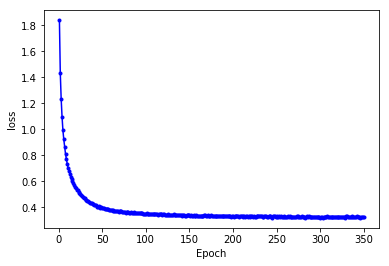

In [4]:
#lr = [0.01, 0.005, 0.001, 0.0005] #[0.005,0.001,0.0005,0.0001] may be better
lr = [0.005,0.001,0.0005,0.0001]
epoch = [200, 250, 300] # first20

run_num = 15 # 2
net_name = 'Orig_ALL_CNN_C'

torch.cuda.set_device(1)

orig_all_cnn_c = help_func.running_model(run_num, orig_all_cnn_c, net_name, lr, epoch, 
                        loader_train, loader_val, loader_test)

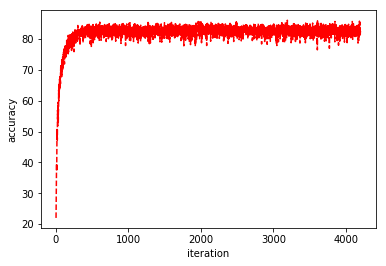

In [6]:
from six.moves import cPickle
save_path = '../datum_for_plotting/run_num_15/Orig_ALL_CNN_C'
f =open(save_path + '/array_epoch_acc.save' , 'rb')
acc_array = cPickle.load(f )
f.close()

max_epoch = 350
a = np.concatenate(acc_array)
a /=100
length = a.shape[0]
acc_axis_test = np.array(np.linspace(1,length, num=length))
plt.plot(acc_axis_test, a.reshape(-1,1), '--r', label='Test')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show
plt.savefig(save_path + '/validation_accuracy' + str(max_epoch) + '.png')

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import os.path
import errno
import sys




import torch
import torch.nn as nn
import torch.nn.functional as F 
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
from torch.utils.data import sampler
import torchvision.transforms as T

In [8]:
import torchvision.datasets as dset
from PIL import Image    
import os
import os.path
import errno
import sys
import torch

class CIFAR100(dset.CIFAR10):

    base_folder = '.'
    train_list = [
        ['train', '16019d7e3df5f24257cddd939b257f8d'],
    ]

    test_list = [
        ['test', 'f0ef6b0ae62326f3e7ffdfab6717acfc'],
    ]
    
    def __init__(self, root, train=True,
                 transform=None, target_transform=None,
                 download=False):
        self.root = os.path.expanduser(root)
        self.transform = transform
        self.target_transform = target_transform
        self.train = train  # training set or test set

        if download:
            self.download()

        if not self._check_integrity():
            raise RuntimeError('Dataset not found or corrupted.' +
                               ' You can use download=True to download it')

        # now load the picked numpy arrays
        self.test_data = []
        if self.train:
            self.train_data = []
            self.train_labels = []
            for fentry in self.train_list:
                f = fentry[0]
                file = os.path.join(self.root, self.base_folder, f)
                fo = open(file, 'rb')
                if sys.version_info[0] == 2:
                    entry = pickle.load(fo)
                else:
                    entry = pickle.load(fo, encoding='latin1')
                self.train_data.append(entry['data'])
                if 'labels' in entry:
                    self.train_labels += entry['labels']
                else:
                    self.train_labels += entry['fine_labels']
                fo.close()

            self.train_data = np.concatenate(self.train_data)
            self.train_data = self.train_data.reshape((5000, 3, 32, 32))
            self.train_data = self.train_data.transpose((0, 2, 3, 1))  # convert to HWC
            print(self.train_data.shape)
        else:
            f = 'test'
            file = os.path.join(self.root, self.base_folder, f)
            fo = open(file, 'rb')
            if sys.version_info[0] == 2:
                entry = pickle.load(fo)
            else:
                entry = pickle.load(fo, encoding='latin1')
            self.test_data = np.array(entry['data'])
            if 'labels' in entry:
                self.test_labels = entry['data']
            else:
                self.test_labels = entry['fine_labels']
            fo.close()
            self.test_data = self.test_data.reshape((1000, 3, 32, 32))
            self.test_data = self.test_data.transpose((0, 2, 3, 1))  # convert to HWC
            print(self.test_data.shape)

    def __getitem__(self, index):
        """
        Args:
            index (int): Index

        Returns:
            tuple: (image, target) where target is index of the target class.
        """
        if self.train:
            img, target = self.train_data[index], self.train_labels[index]
        else:
            img, target = self.test_data[index], self.test_labels[index]

        # doing this so that it is consistent with all other datasets
        # to return a PIL Image
        img = Image.fromarray(img.astype('uint8')).convert('RGB')

        if self.transform is not None:
            img = self.transform(img)

        if self.target_transform is not None:
            target = self.target_transform(target)

        return img, target


    def __len__(self):
        if self.train:
            return len(self.train_data)
        else:
            return len(self.test_data)                
            
    def _check_integrity(self):
        return True
    


if sys.version_info[0] == 2:
    import cPickle as pickle
else:
    import pickle

transform = T.Compose([
                T.ToTensor(),
                T.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))
            ])

A_train = CIFAR100('./class1', train=True, download=False,
                             transform=transform)
loaderA_train = torch.utils.data.DataLoader(A_train, batch_size=4)



A_test = CIFAR100('./class1', train=False, download=False,
                             transform=transform)
loaderA_test = torch.utils.data.DataLoader(A_test, batch_size=4)


B_train = CIFAR100('./class2', train=True, download=False,
                             transform=transform)
loaderB_train = torch.utils.data.DataLoader(B_train, batch_size=4)


B_test = CIFAR100('./class2', train=False, download=False,
                             transform=transform)
loaderB_test = torch.utils.data.DataLoader(B_test, batch_size=4)
   

(5000, 32, 32, 3)
(1000, 32, 32, 3)
(5000, 32, 32, 3)
(1000, 32, 32, 3)


In [63]:
import copy
import new_ALL_Conv
tf_all_cnn_c_step1_class1 = new_ALL_Conv.ALL_CNN_C()
tf_params = copy.deepcopy(orig_all_cnn_c.state_dict())
tf_all_cnn_c_step1_class1.load_state_dict(tf_params)

tf_all_cnn_c_step1_class1.conv9 = nn.Conv2d(192, 10 ,kernel_size=1)
nn.init.kaiming_normal_(tf_all_cnn_c_step1_class1.conv9.weight)
nn.init.constant_(tf_all_cnn_c_step1_class1.conv9.bias, 0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [64]:
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(tf_all_cnn_c_step1_class1.conv9.parameters(),
                         lr=0.001, momentum=0.9)

In [65]:
USE_GPU = True
dtype = torch.float32 # we will be using float throughout this tutorial
if USE_GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')

def check_accuracy(loader, model):
    if loader.dataset.train:
        print('Checking accuracy on validation set')
    else:
        print('Checking accuracy on test set')   
    num_correct = 0
    num_samples = 0
    model.eval()  # set model to evaluation mode
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device, dtype=dtype)  # move to device, e.g. GPU
            y = y.to(device=device, dtype=torch.long)
            scores = model(x)
            _, preds = scores.max(1)
            num_correct += (preds == y).sum()
            num_samples += preds.size(0)
        acc = float(num_correct) / num_samples *100
        print('Got %d / %d correct (%.2f)' % (num_correct, num_samples,  acc))
    return acc*100

def running_model_tf_step1(run_num, net, net_name, lr_list, epoch_list, loader_train, 
                   loader_test, optimizer):
    train_batch_size = 4
    test_batch_size = 4
    

    # Constant to control how frequently we print train loss
    print_every = 100

    print('using device:', device)
    
    #net = BaseNet_A()
    net = net.to(device=device)
    criterion = nn.CrossEntropyLoss()        
        
    lr_1, lr_2, lr_3, lr_4 = lr_list[0], lr_list[1], lr_list[2], lr_list[3]
    weight_decay = 0.001

    max_epoch = 50
    display_interval = 500

    train_size = 5000
    test_size = 1000

    num_train_batch = train_size/train_batch_size
    num_test_batch = test_size/test_batch_size

    train_loss = np.zeros((max_epoch,1))
    val_acc = np.zeros((max_epoch,1))
    

    epoch_acc = [] # max_epoch x num
    print("begin training")
    for epoch in range(max_epoch):
        if(epoch<epoch_list[0]):
            lr = lr_1
        elif(epoch<epoch_list[1]):
            lr = lr_2
        elif(epoch<epoch_list[2]):
            lr = lr_3
        else:
            lr = lr_4
            
        optimizer = optimizer
    
        running_epoch_loss = 0.
        running_loss_print = 0.
        epoch_total_num = 0
        correct_num = 0
    
        i_acc = []
        #for i, data in enumerate(trainloader):
        for i, data in enumerate(loader_train):
            net.train()
        
            inputs_data, labels_data = data
            inputs, labels = Variable(inputs_data), Variable(labels_data)
            inputs = inputs.to(device=device, dtype=dtype)
            labels = labels.to(device=device, dtype=torch.long)
        
    
        
        
            outputs = net(inputs)
            loss = criterion(outputs, labels)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            running_epoch_loss += loss.item()
            running_loss_print += loss.item()
            if i%500 == 499: #net a, b, c 500 print once
                
                acc = check_accuracy(loader_test, net)
                i_acc.append(acc)
                print('%d epoch, %5d iteration, loss:%.3f' 
                      %(epoch+1, i+1, running_loss_print/500) )
                running_loss_print = 0.
            
            
        
        
        train_loss[epoch] = running_epoch_loss/num_train_batch
        epoch_acc.append(i_acc)
        
        val_acc[epoch] = np.sum(epoch_acc[epoch])/49
        
        print(" num %d epoch " %epoch)
        print("####### Training Loss #######")
        print(train_loss[epoch])
        
    
    print('finish training \n')

    



##################################################################################################
    print('now begin saving datum for next step plotting')
    
    save_path = '../datum_for_plotting/run_num_' + str(run_num)+'/'+ net_name
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    f = open(save_path + '/train_loss.save', 'wb')
    cPickle.dump(train_loss, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    f = open(save_path + '/val_acc.save', 'wb')
    cPickle.dump(val_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    f = open(save_path + '/epoch_acc.save', 'wb')
    cPickle.dump(epoch_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    array_epoch_acc = np.array(epoch_acc)
    f = open(save_path + '/array_epoch_acc.save', 'wb')
    cPickle.dump(array_epoch_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    #f = open(save_path + '/test_acc.save', 'wb')
    #cPickle.dump(test_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    #f.close()



    torch.save(net, save_path+'/'+ net_name +'.pkl') # save whole net structure and params
    torch.save(net.state_dict, save_path+'/'+ net_name +'_params.pkl') # only save model params
 
    
    
    
##################################################################################################    
    print("now plotting accuracies and losses")  
    itern_axis_train = np.array(np.linspace(1,max_epoch,num=max_epoch))
    

    plt.plot(itern_axis_train, train_loss,'-b.', label='Train')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.show
    plt.savefig(save_path + '/train_loss' + str(max_epoch) + '.png')
    
    #a = np.concatenate(array_epoch_acc)
    #a /= 100
    #length = a.shape[0]
    #itern_axis_test = np.array(np.linspace(1,length, num=length))
    #plt.plot(itern_axis_test, a.reshape(-1,1), '--r', label='Test')
    #plt.xlabel('iteration')
    #plt.ylabel('accuracy')
    #plt.savefig(save_path + '/testing_accuracy' + str(max_epoch) + '.png')
    
    return net

using device: cuda
begin training
Checking accuracy on test set
Got 459 / 1000 correct (45.90)
1 epoch,   500 iteration, loss:1.502
Checking accuracy on test set
Got 477 / 1000 correct (47.70)
1 epoch,  1000 iteration, loss:1.462
 num 0 epoch 
####### Training Loss #######
[1.47700959]
Checking accuracy on test set
Got 476 / 1000 correct (47.60)
2 epoch,   500 iteration, loss:1.453
Checking accuracy on test set
Got 486 / 1000 correct (48.60)
2 epoch,  1000 iteration, loss:1.415
 num 1 epoch 
####### Training Loss #######
[1.43411993]
Checking accuracy on test set
Got 474 / 1000 correct (47.40)
3 epoch,   500 iteration, loss:1.437
Checking accuracy on test set
Got 497 / 1000 correct (49.70)
3 epoch,  1000 iteration, loss:1.405
 num 2 epoch 
####### Training Loss #######
[1.41563109]
Checking accuracy on test set
Got 474 / 1000 correct (47.40)
4 epoch,   500 iteration, loss:1.417
Checking accuracy on test set
Got 506 / 1000 correct (50.60)
4 epoch,  1000 iteration, loss:1.391
 num 3 epoc

Got 514 / 1000 correct (51.40)
33 epoch,   500 iteration, loss:1.384
Checking accuracy on test set
Got 517 / 1000 correct (51.70)
33 epoch,  1000 iteration, loss:1.364
 num 32 epoch 
####### Training Loss #######
[1.36816619]
Checking accuracy on test set
Got 515 / 1000 correct (51.50)
34 epoch,   500 iteration, loss:1.373
Checking accuracy on test set
Got 518 / 1000 correct (51.80)
34 epoch,  1000 iteration, loss:1.354
 num 33 epoch 
####### Training Loss #######
[1.3604734]
Checking accuracy on test set
Got 516 / 1000 correct (51.60)
35 epoch,   500 iteration, loss:1.374
Checking accuracy on test set
Got 514 / 1000 correct (51.40)
35 epoch,  1000 iteration, loss:1.351
 num 34 epoch 
####### Training Loss #######
[1.36483865]
Checking accuracy on test set
Got 514 / 1000 correct (51.40)
36 epoch,   500 iteration, loss:1.375
Checking accuracy on test set
Got 513 / 1000 correct (51.30)
36 epoch,  1000 iteration, loss:1.350
 num 35 epoch 
####### Training Loss #######
[1.36388519]
Checkin

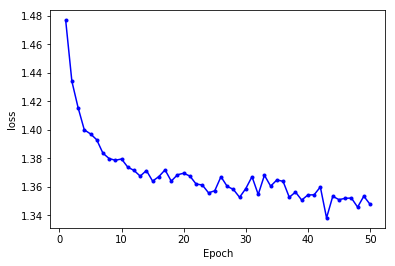

In [67]:
run_num = 12 # 10
net_name = 'tf_ALL_CNN_C_step1_class1'
lr = [0.01, 0.005, 0.001, 0.0005]
epoch = [35, 40, 45]

tf_all_cnn_c_step1_class1 = running_model_tf_step1(run_num, tf_all_cnn_c_step1_class1, net_name, lr, epoch,
                                    loaderA_train, loaderA_test, optimizer_ft)

In [68]:
save_path = '../datum_for_plotting/run_num_12/tf_ALL_CNN_C_step1_class1'
f =open(save_path + '/array_epoch_acc.save' , 'rb')
acc_array = cPickle.load(f )
f.close()
print(acc_array.shape)

(50, 2)


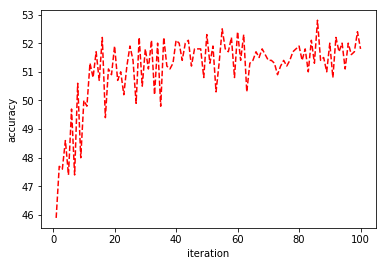

In [69]:
a = np.concatenate(acc_array)
a /=100
length = a.shape[0]
acc_axis_test = np.array(np.linspace(1,length, num=length))
plt.plot(acc_axis_test, a.reshape(-1,1), '--r', label='Test')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.show
plt.savefig(save_path + '/validation_accuracy' + str(max_epoch) + '.png')

In [70]:
def running_model_B(run_num, net, net_name, lr_list, epoch_list, loader_train, 
                   loader_test):
    train_batch_size = 4
    test_batch_size = 4
    

    # Constant to control how frequently we print train loss
    print_every = 100

    print('using device:', device)
    
    #net = BaseNet_A()
    net = net.to(device=device)
    criterion = nn.CrossEntropyLoss()        
        
    lr_1, lr_2, lr_3, lr_4 = lr_list[0], lr_list[1], lr_list[2], lr_list[3]
    weight_decay = 0.001

    max_epoch = 50 #350
    display_interval = 500

    train_size = 5000
    test_size = 1000

    num_train_batch = train_size/train_batch_size
    num_test_batch = test_size/test_batch_size

    train_loss = np.zeros((max_epoch,1))
    val_acc = np.zeros((max_epoch,1))
    
    epoch_acc = [] # max_epoch x num
    print("begin training")
    for epoch in range(max_epoch):
        if(epoch<epoch_list[0]):
            lr = lr_1
        elif(epoch<epoch_list[1]):
            lr = lr_2
        elif(epoch<epoch_list[2]):
            lr = lr_3
        else:
            lr = lr_4
    
        optimizer = optim.SGD( net.parameters(), lr=0.001,
                              momentum=0.9, weight_decay=weight_decay)
    
        running_epoch_loss = 0.
        running_loss_print = 0.
        epoch_total_num = 0
        correct_num = 0
    
        i_acc = []
        
        for i, data in enumerate(loader_train):
            net.train()
        
            inputs_data, labels_data = data
            inputs, labels = Variable(inputs_data), Variable(labels_data)
            inputs = inputs.to(device=device, dtype=dtype)
            labels = labels.to(device=device, dtype=torch.long)
        
    
        
        
            outputs = net(inputs)
            loss = criterion(outputs, labels)
        
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            running_epoch_loss += loss.item()
            running_loss_print += loss.item()
            if i%500 == 499: #net a, b, c 500 print once
                
                acc = check_accuracy(loader_test, net)
                i_acc.append(acc)
                print('%d epoch, %5d iteration, loss:%.3f' 
                      %(epoch+1, i+1, running_loss_print/500) )
                running_loss_print = 0.
            
            
        
        train_loss[epoch] = running_epoch_loss/num_train_batch
        epoch_acc.append(i_acc)
        
        val_acc[epoch] = np.sum(epoch_acc[epoch])/49
        
        print(" num %d epoch " %epoch)
        print("####### Training Loss #######")
        print(train_loss[epoch])
       
    
    print('finish training \n')

    



##################################################################################################
    print('now begin saving datum for next step plotting')
    
    save_path = '../datum_for_plotting/run_num_' + str(run_num)+'/'+ net_name
    if not os.path.exists(save_path):
        os.makedirs(save_path)
    f = open(save_path + '/train_loss.save', 'wb')
    cPickle.dump(train_loss, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    f = open(save_path + '/val_acc.save', 'wb')
    cPickle.dump(val_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    f = open(save_path + '/epoch_acc.save', 'wb')
    cPickle.dump(epoch_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    array_epoch_acc = np.array(epoch_acc)
    f = open(save_path + '/array_epoch_acc.save', 'wb')
    cPickle.dump(array_epoch_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    f.close()

    #f = open(save_path + '/test_acc.save', 'wb')
    #cPickle.dump(test_acc, f, protocol=cPickle.HIGHEST_PROTOCOL)
    #f.close()



    torch.save(net, save_path+'/'+ net_name +'.pkl') # save whole net structure and params
    torch.save(net.state_dict, save_path+'/'+ net_name +'_params.pkl') # only save model params
 
    
    
    
##################################################################################################    
    print("now plotting accuracies and losses")  
    itern_axis_train = np.array(np.linspace(1,max_epoch,num=max_epoch))
    

    plt.plot(itern_axis_train, train_loss,'-b.', label='Train')
    plt.xlabel('Epoch')
    plt.ylabel('loss')
    plt.savefig(save_path + '/train_loss' + str(max_epoch) + '.png')
    
    #a = np.concatenate(array_epoch_acc)
    #length = a.shape[0]
    #itern_axis_test = np.array(np.linspace(1,length, num=length))
    #plt.plot(itern_axis_test, a.reshape(-1,1), '--r', label='Test')
    #plt.xlabel('iteration')
    #plt.ylabel('loss')
    #plt.savefig(save_path + '/testing_accuracy' + str(max_epoch) + '.png')
    
    return net

using device: cuda
begin training
Checking accuracy on test set
Got 584 / 1000 correct (58.40)
1 epoch,   500 iteration, loss:1.296
Checking accuracy on test set
Got 664 / 1000 correct (66.40)
1 epoch,  1000 iteration, loss:1.104
 num 0 epoch 
####### Training Loss #######
[1.16614052]
Checking accuracy on test set
Got 698 / 1000 correct (69.80)
2 epoch,   500 iteration, loss:0.888
Checking accuracy on test set
Got 703 / 1000 correct (70.30)
2 epoch,  1000 iteration, loss:0.835
 num 1 epoch 
####### Training Loss #######
[0.84528832]
Checking accuracy on test set
Got 713 / 1000 correct (71.30)
3 epoch,   500 iteration, loss:0.713
Checking accuracy on test set
Got 756 / 1000 correct (75.60)
3 epoch,  1000 iteration, loss:0.708
 num 2 epoch 
####### Training Loss #######
[0.69979437]
Checking accuracy on test set
Got 743 / 1000 correct (74.30)
4 epoch,   500 iteration, loss:0.592
Checking accuracy on test set
Got 733 / 1000 correct (73.30)
4 epoch,  1000 iteration, loss:0.577
 num 3 epoc

Got 770 / 1000 correct (77.00)
33 epoch,   500 iteration, loss:0.069
Checking accuracy on test set
Got 770 / 1000 correct (77.00)
33 epoch,  1000 iteration, loss:0.097
 num 32 epoch 
####### Training Loss #######
[0.0825994]
Checking accuracy on test set
Got 788 / 1000 correct (78.80)
34 epoch,   500 iteration, loss:0.065
Checking accuracy on test set
Got 764 / 1000 correct (76.40)
34 epoch,  1000 iteration, loss:0.105
 num 33 epoch 
####### Training Loss #######
[0.08593191]
Checking accuracy on test set
Got 780 / 1000 correct (78.00)
35 epoch,   500 iteration, loss:0.098
Checking accuracy on test set
Got 751 / 1000 correct (75.10)
35 epoch,  1000 iteration, loss:0.061
 num 34 epoch 
####### Training Loss #######
[0.08208886]
Checking accuracy on test set
Got 783 / 1000 correct (78.30)
36 epoch,   500 iteration, loss:0.060
Checking accuracy on test set
Got 767 / 1000 correct (76.70)
36 epoch,  1000 iteration, loss:0.072
 num 35 epoch 
####### Training Loss #######
[0.06723274]
Checkin

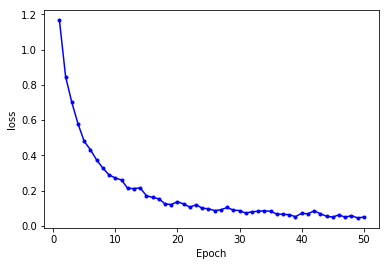

In [71]:
run_num = 12
net_name = 'tf_ALL_CNN_C_step2_class1'
lr = [0.01, 0.005, 0.001, 0.0005]
epoch = [35, 40, 45]
tf_all_cnn_c_step2_class1 = running_model_B(run_num, tf_all_cnn_c_step1_class1, net_name, 
                                lr, epoch,loaderA_train, loaderA_test)

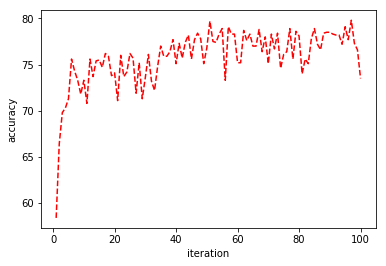

In [72]:
save_path = '../datum_for_plotting/run_num_12/tf_ALL_CNN_C_step2_class1'
f =open(save_path + '/array_epoch_acc.save' , 'rb')
acc_array = cPickle.load(f )
f.close()
a = np.concatenate(acc_array)
length = a.shape[0]
a /= 100
acc_axis_test = np.array(np.linspace(1,length, num=length))
plt.plot(acc_axis_test, a.reshape(-1,1), '--r', label='Test')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig(save_path + '/validation_accuracy' + str(max_epoch) + '.png')

In [73]:
import copy
tf_all_cnn_c_step1_class2 = ALL_CNN_C(num_classes=10)
tf_params_class2 = copy.deepcopy(orig_all_cnn_c.state_dict())
tf_all_cnn_c_step1_class2.load_state_dict(tf_params_class2)

tf_all_cnn_c_step1_class2.conv9 = nn.Conv2d(192, 10 ,kernel_size=1)
nn.init.kaiming_normal_(tf_all_cnn_c_step1_class2.conv9.weight)
nn.init.constant_(tf_all_cnn_c_step1_class2.conv9.bias, 0)

Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], requires_grad=True)

In [74]:
criterion = nn.CrossEntropyLoss()
optimizer_ft_class2 = optim.SGD(tf_all_cnn_c_step1_class2.conv9.parameters(),
                         lr=0.001, momentum=0.9)

using device: cuda
begin training
Checking accuracy on test set
Got 274 / 1000 correct (27.40)
1 epoch,   500 iteration, loss:2.207
Checking accuracy on test set
Got 296 / 1000 correct (29.60)
1 epoch,  1000 iteration, loss:2.060
 num 0 epoch 
####### Training Loss #######
[2.10762772]
Checking accuracy on test set
Got 324 / 1000 correct (32.40)
2 epoch,   500 iteration, loss:1.948
Checking accuracy on test set
Got 322 / 1000 correct (32.20)
2 epoch,  1000 iteration, loss:1.898
 num 1 epoch 
####### Training Loss #######
[1.91534363]
Checking accuracy on test set
Got 333 / 1000 correct (33.30)
3 epoch,   500 iteration, loss:1.875
Checking accuracy on test set
Got 336 / 1000 correct (33.60)
3 epoch,  1000 iteration, loss:1.860
 num 2 epoch 
####### Training Loss #######
[1.86264899]
Checking accuracy on test set
Got 334 / 1000 correct (33.40)
4 epoch,   500 iteration, loss:1.852
Checking accuracy on test set
Got 349 / 1000 correct (34.90)
4 epoch,  1000 iteration, loss:1.833
 num 3 epoc

Got 369 / 1000 correct (36.90)
33 epoch,   500 iteration, loss:1.773
Checking accuracy on test set
Got 377 / 1000 correct (37.70)
33 epoch,  1000 iteration, loss:1.773
 num 32 epoch 
####### Training Loss #######
[1.78118909]
Checking accuracy on test set
Got 374 / 1000 correct (37.40)
34 epoch,   500 iteration, loss:1.793
Checking accuracy on test set
Got 386 / 1000 correct (38.60)
34 epoch,  1000 iteration, loss:1.771
 num 33 epoch 
####### Training Loss #######
[1.78336965]
Checking accuracy on test set
Got 364 / 1000 correct (36.40)
35 epoch,   500 iteration, loss:1.787
Checking accuracy on test set
Got 379 / 1000 correct (37.90)
35 epoch,  1000 iteration, loss:1.765
 num 34 epoch 
####### Training Loss #######
[1.77435395]
Checking accuracy on test set
Got 368 / 1000 correct (36.80)
36 epoch,   500 iteration, loss:1.782
Checking accuracy on test set
Got 374 / 1000 correct (37.40)
36 epoch,  1000 iteration, loss:1.770
 num 35 epoch 
####### Training Loss #######
[1.78025115]
Checki

/root/Anacondas/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ALL_CNN_C. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


now plotting accuracies and losses


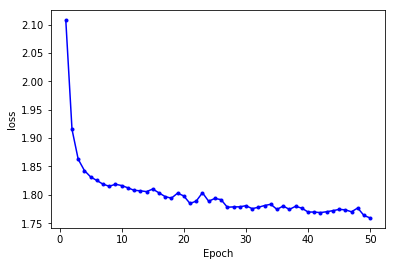

In [75]:
run_num = 10
net_name = 'tf_ALL_CNN_C_step1_class2'
lr = [0.01, 0.005, 0.001, 0.0005]
epoch = [35, 40, 45]
tf_all_cnn_c_step1_class2 = running_model_tf_step1(run_num, tf_all_cnn_c_step1_class2, net_name, lr, epoch,
                                    loaderB_train, loaderB_test, optimizer_ft_class2)

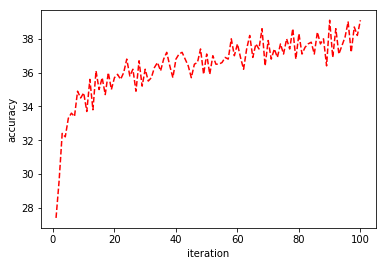

In [76]:
save_path = '../datum_for_plotting/run_num_10/tf_ALL_CNN_C_step1_class2'
f =open(save_path + '/array_epoch_acc.save' , 'rb')
acc_array = cPickle.load(f )
f.close()
a = np.concatenate(acc_array)
length = a.shape[0]
a /= 100
acc_axis_test = np.array(np.linspace(1,length, num=length))
plt.plot(acc_axis_test, a.reshape(-1,1), '--r', label='Test')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig(save_path + '/validation_accuracy' + str(max_epoch) + '.png')

using device: cuda
begin training
Checking accuracy on test set
Got 554 / 1000 correct (55.40)
1 epoch,   500 iteration, loss:1.483
Checking accuracy on test set
Got 587 / 1000 correct (58.70)
1 epoch,  1000 iteration, loss:1.237
 num 0 epoch 
####### Training Loss #######
[1.31161387]
Checking accuracy on test set
Got 624 / 1000 correct (62.40)
2 epoch,   500 iteration, loss:1.025
Checking accuracy on test set
Got 646 / 1000 correct (64.60)
2 epoch,  1000 iteration, loss:0.928
 num 1 epoch 
####### Training Loss #######
[0.95516873]
Checking accuracy on test set
Got 675 / 1000 correct (67.50)
3 epoch,   500 iteration, loss:0.872
Checking accuracy on test set
Got 672 / 1000 correct (67.20)
3 epoch,  1000 iteration, loss:0.782
 num 2 epoch 
####### Training Loss #######
[0.81577081]
Checking accuracy on test set
Got 688 / 1000 correct (68.80)
4 epoch,   500 iteration, loss:0.737
Checking accuracy on test set
Got 723 / 1000 correct (72.30)
4 epoch,  1000 iteration, loss:0.667
 num 3 epoc

Checking accuracy on test set
Got 732 / 1000 correct (73.20)
33 epoch,   500 iteration, loss:0.072
Checking accuracy on test set
Got 741 / 1000 correct (74.10)
33 epoch,  1000 iteration, loss:0.082
 num 32 epoch 
####### Training Loss #######
[0.07437417]
Checking accuracy on test set
Got 747 / 1000 correct (74.70)
34 epoch,   500 iteration, loss:0.075
Checking accuracy on test set
Got 749 / 1000 correct (74.90)
34 epoch,  1000 iteration, loss:0.073
 num 33 epoch 
####### Training Loss #######
[0.07603262]
Checking accuracy on test set
Got 741 / 1000 correct (74.10)
35 epoch,   500 iteration, loss:0.060
Checking accuracy on test set
Got 745 / 1000 correct (74.50)
35 epoch,  1000 iteration, loss:0.070
 num 34 epoch 
####### Training Loss #######
[0.07477679]
Checking accuracy on test set
Got 725 / 1000 correct (72.50)
36 epoch,   500 iteration, loss:0.087
Checking accuracy on test set
Got 739 / 1000 correct (73.90)
36 epoch,  1000 iteration, loss:0.085
 num 35 epoch 
####### Training Lo

/root/Anacondas/anaconda3/envs/cs231n/lib/python3.6/site-packages/torch/serialization.py:241: UserWarning: Couldn't retrieve source code for container of type ALL_CNN_C. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


now plotting accuracies and losses


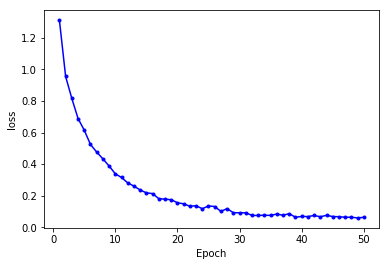

In [77]:
run_num = 10
net_name = 'tf_ALL_CNN_C_step2_class2'
lr = [0.01, 0.005, 0.001, 0.0005]
epoch = [35, 40, 45]
tf_all_cnn_c_step2_class2 = running_model_B(run_num, tf_all_cnn_c_step1_class2, net_name, 
                                lr, epoch,loaderB_train, loaderB_test)

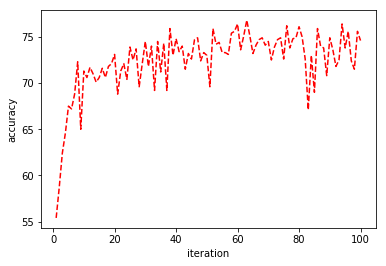

In [78]:
save_path = '../datum_for_plotting/run_num_10/tf_ALL_CNN_C_step2_class2'
f =open(save_path + '/array_epoch_acc.save' , 'rb')
acc_array = cPickle.load(f )
f.close()
a = np.concatenate(acc_array)
length = a.shape[0]
a /= 100
acc_axis_test = np.array(np.linspace(1,length, num=length))
plt.plot(acc_axis_test, a.reshape(-1,1), '--r', label='Test')
plt.xlabel('iteration')
plt.ylabel('accuracy')
plt.savefig(save_path + '/validation_accuracy' + str(max_epoch) + '.png')